# **Text Mining with Python 3**
<br><br><br>
*Filippo Olivi - 05/05/2020*

*The report was made as part of the UNCC Senior Project course, under the supervision of Dr. Berardinelli*


***

## **Introduction:**<br><br><br>

Text Mining is the process which acts on text and results in the extraction of quality, focused, and/or statistical data.

This report covers my first approach basic text mining, based on my experience working on a Senior Project on my senior year at UNCC. 
It is meant to provide help and insight about how to start an analysis on the topic, since text mining as a whole is a really broad one which also spans different areas, and feeling a bit lost at the start would be normal. 
The reader will be introduced to how I personally decided to set it up and which tools I used or considered using for this first approach.

*How many times have you gone looking through a very discouraging number of IT jobs online, only to find out that most of them require very different skillsets from each other? What could the most required ones be? What would it be more efficient to learn first, in order to be eligible for the widest possible array of nowadays' IT jobs?*

All of those questions that I frequently asked myself had a big part in helping me decide to pursue this topic further, when Dr. Berardinelli brought this idea up. 

<br>
<br>

**About the analysis:**<br>
<br>

This particular analysis is originally supposed to be performed on a dataset filled with job postings. The purpose is to actually filter out all the jobs that are not relevant (ones not associated with IT), look into the text body of the post, search and filter them all to get some insight into a few things that might be of interest to anyone looking for a job. In detail, the objective was to **extract popular and very demanded *skills*,** which the posting's writer usually includes in a list to find people for specific tasks.

However, this report documents the first test before acting on the real dataset, instead performing a simulation making use of a much smaller and efficient (time and resource-wise) dataset. The contents of the set, which include articles about IT topics, cover a very wide range, from artificial intelligence to machine learning, including programming languages.

The results, while not necessarily always resulting in the most wanted skills for jobs, was surprisingly *pretty close to what was to be expected, as far as IT jobs' requirements go*. Furthermore, documenting the test analysis here allows me to offer insight about how the initial script was written, which thoughts were followed.<br>

In particular, the data I focused on extracting was:

     - The most mentioned IT skills, aka the most required ones
     - The most popular combinations of IT skills, to make useful pairings

**Sources/Help received from:**<br>
<br>
The analysis was done extracting data from the body of several articles, stored on [MongoDB](https://www.mongodb.com/). The dataset is provided by [Kaggle](https://www.kaggle.com/datasets).
Moreover, I got some inspiration and help from another guide on [Datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python) for working with graphics, in particular a WordCloud, and the very first pre-processing part.

***

## **The Process:**<br><br><br>

**DISCLAIMER:** This is supposed to be a beginner-friendly report, and as such includes many insights in the form of comments. However, a **very basic understanding of how Python syntax and Python-related packages work is still required** to get a full understanding out of it.

## **0.**
## **Tools / Packages used**<br><br><br>

**For text processing:**
<br>
 * [NumPy](https://numpy.org/) for general scientific computing purpose, mostly used for N-dimensional arrays
 * [Pandas](https://pandas.pydata.org/) is one of the best libraries for data science, featuring the fundamental DataFrame object, that considerably helps for storing the articles retrieved from the collection
 * [Matplotlib](https://matplotlib.org/) is essential for creating visualizations for a more comprehensive analysis, such as graphs
 * [NLTK](https://www.nltk.org/) or Natural Language Toolkit, is a very useful tool to process all the neutral text as it is found in the articles. Processing before running the actual queries is maybe the most crucial step in order for it to result in a clean and excellent analysis. Actual examples of what this can do is eliminating stopwords (words that are not to be included, like "like/as/the/is/at/etc...")
 
**For fancy graphics:**
<br>
 * [WordCloud](https://github.com/amueller/word_cloud) is a tool developed by "amueller" that allows to print the particular graphic showing the most used words all together in a chosen shape
 
**For database/script mediation:**
<br>
 * [PyMongo](https://pymongo.readthedocs.io/en/stable/) is the Python distribution that permits to easily interact with MongoDB using Python

***

## **1.**
## **Importing the tools**<br><br><br>

Nothing particularly difficult here.<br> 
<br>
Even though the guide goes in order from the start to the end of the script, *importing all the packages was not done all at the very beginning*, because I could not know what exactly I would need in the future.

So, this part started with just a few of these statements, and got filled as the script was being written.

In [1]:
# Import all the modules/packages needed first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
set(stopwords.words('english'))
from nltk.tokenize.treebank import TreebankWordDetokenizer

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pymongo
from pymongo import MongoClient

In C:\Users\filip\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\filip\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\filip\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\filip\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\filip\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


***


## **2.**
## **Two ways to access data**<br><br><br>

**From a csv file:**<br>
<br>
Initially, I started doing the analysis locally on my end. The actual dataset was downloaded from Kaggle as a csv file called "articles.csv", and Pandas provides a very useful function called **read_csv** that allows you to read from the file.

Very easily, since the file resides on the same folder as the script, only one line of code was needed to access the data and make a DataFrame object out of it:

In [2]:
# Using Pandas .read_csv to read the file
dataFrame = pd.read_csv("articles.csv")

**From MongoDB:**<br>
<br>
However this was not optimal as I wanted to access data directly from the database and collection hosted on a server I have access to (kindly provided to me by Dr. Berardinelli), which uses MongoDB. For this reason, using the **PyMongo** package was essential in making a bridge to connect the script and the database.

The only thing to be wary of is that a *MongoDB must obviously be active on the server before*.

Here is the code that nets the same result as the csv method, but connecting to the server instead:

In [ ]:
# A MongoDB instance must be running before, activate with: mongod
# Connects to the default host and port
client = MongoClient()

# Uses the database name instead of test, which in this particular case is the db
db = client.test 
collection = db.articles                        

# Using Pandas DataFrame object to read the file              
dataFrame = pd.DataFrame(list(collection.find()))

Now that we have our **DataFrame Pandas object** (which includes all the articles in the dataset) comfortably ordered, we can start processing the data!

***


## **3.**
## **Fiddling with the dataset**<br><br><br>

Before starting the analysis, I thought it would be important to play around a bit with the dataset.

Doing this, I could easily get familiar with:

 * The structure of the dataset
 * How to use some basic Pandas, NumPy and Matplotlib functions

For this first part of it, the Datacamp guide (mentioned and linked in the sources and bibliography) had a lot of great ways to get a nice first look into the dataset, which I used too here, adapted to my set:

In [3]:
# Look at the first 5 entries of the dataset with Pandas .head() method
dataFrame.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [4]:
# See how many entries its got. .shape[0] gives rows, .shape[1] gives columns 
print(f'There are {dataFrame.shape[0]} entries in this dataset')

There are 337 entries in this dataset


In [5]:
# How many unique authors, using the Pandas unique function
print(f'There are {len(dataFrame.author.unique())} unique authors in this dataset')

There are 182 unique authors in this dataset


In [6]:
# Make another dataset called author, where all entries are grouped by author name and with only certain columns
author = dataFrame[["author", "claps", "reading_time", "title"]].groupby("author")

author.describe().head()

reading_time                                            \
                          count   mean       std   min    25%   50%   75%   
author                                                                      
Abhishek Parbhakar          4.0   5.25  1.500000   3.0   5.25   6.0   6.0   
Adam Geitgey               16.0  14.25  1.570563  11.0  13.00  15.0  15.0   
Ahmed El Deeb               2.0   5.00  2.828427   3.0   4.00   5.0   6.0   
AirbnbEng                   2.0  10.00  1.414214   9.0   9.50  10.0  10.5   
Akash Shende                1.0   3.00       NaN   3.0   3.00   3.0   3.0   

                          
                     max  
author                    
Abhishek Parbhakar   6.0  
Adam Geitgey        16.0  
Ahmed El Deeb        7.0  
AirbnbEng           11.0  
Akash Shende         3.0

In [7]:
# Sort the dataframe showing only the highest 5 reading times. Notice that an article was posted 2 times.
dataFrame.sort_values(by = "reading_time", ascending = False).head()

,author,claps,reading_time,link,title,text
106,Paul Christiano,43,31,https://ai-alignment.com/a-formalization-of-in...,Formalizing indirect normativity – AI Alignment,This post outlines a formalization of what Nic...
27,Paul Christiano,43,31,https://ai-alignment.com/a-formalization-of-in...,Formalizing indirect normativity – AI Alignment,This post outlines a formalization of what Nic...
274,Leigh Alexander,2.7K,31,https://medium.com/@leighalexander/the-future-...,The Future We Wanted – Leigh Alexander – Medium,I wonder a lot about how Jane ended up. When w...
311,Rohan Kapur,1K,30,https://ayearofai.com/rohan-lenny-1-neural-net...,Rohan & Lenny #1: Neural Networks & The Backpr...,"In Rohan’s last post, he talked about evaluati..."
209,Gary Marcus,1.3K,27,https://medium.com/@GaryMarcus/in-defense-of-s...,In defense of skepticism about deep learning –...,In a recent appraisal of deep learning (Marcus...


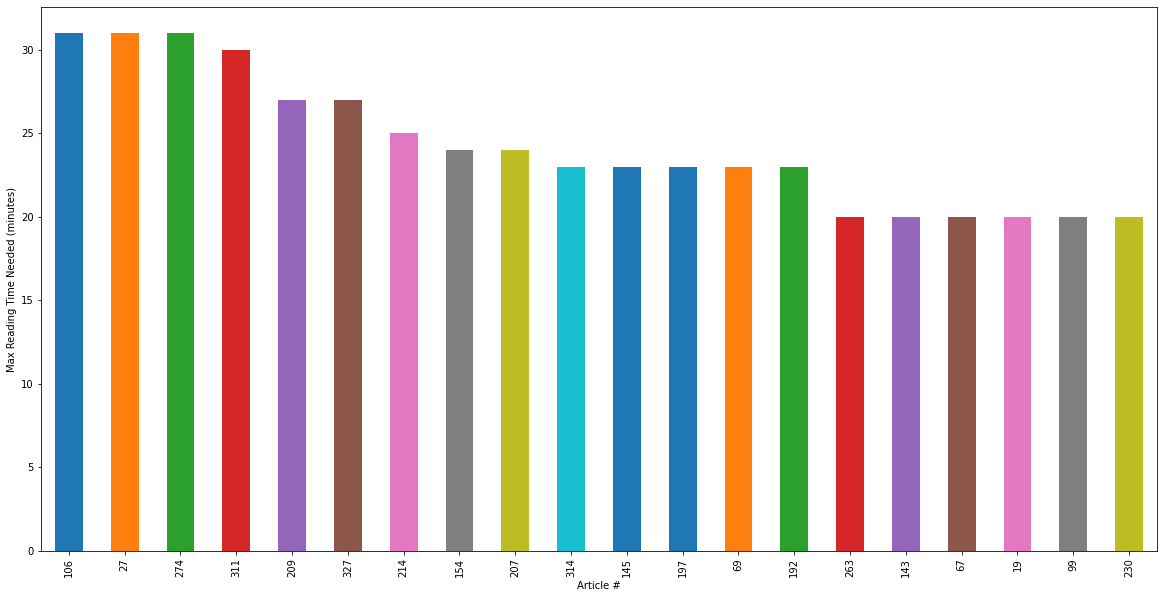

In [8]:
# Using MathPlotLib we set the dimensions of the graph
plt.figure(figsize = (20, 10))

# With Pandas plot the top 20 reading times sorted by highest ones
dataFrame.sort_values(by = "reading_time", ascending = False)["reading_time"].head(20).plot.bar()

# Set label for the axes
plt.xlabel("Article #")
plt.ylabel("Max Reading Time Needed (minutes)")

plt.show()

Since I got to the point of drawing a graph, I figured this might have been the time to try drawing a **wordcloud**. 
Following the Datacamp guide and looking into the WordCloud documentation myself I found out that using the library is pretty simple.

*The first wordcloud I made was only considering the text of the first article, just to try it out.*

While the "wordcloud1" object is created with the WordCloud function using the default stopwords, we use Matplotlib to print it, specifying the size.

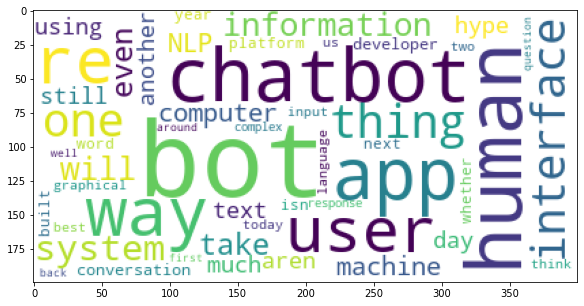

In [9]:
# Let's make a WordCloud with the most common words from the first article. We can also use the set of stopwords provided by
# NLTK, or if undeclared, the default ones
firstArticle = dataFrame.text[0]
wordcloud1 = WordCloud(max_words = 50, background_color = "white").generate(firstArticle)

# Now show it with MathPlotLib
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud1)

#### *Pretty cool!*

The mask can modified a lot, using different shapes and colors but for now that's not what this guide is focusing on.

If you are interested in more styles for your wordcloud, check out the Datacamp guide linked in the Sources section!

### Note that the picture can also be saved to file, just by using the *.to_file('your_path_here)* for the wordcloud, or by using *plt.savefig('your_path_here')* for every other graph

***


## **4.**
## **Processing the text**<br><br><br>

**Processing is the most important part** now, because it is about cleaning out the text to avoid misleading and/or incorrect results. 
In fact, the deeper I go and the more accurate and meticulous I am with this part, the better my output will be at the end.

I divided this part in 3, to make it easier to follow.

**4.1 - A huge article:**<br>
<br>
The first wordcloud only used the first article, but now that I was about to clean the text, it was also time to work on all the articles, because the data I wanted to pull out had to be from the *whole dataset*!

So, the **first step was to chain together every entry of the dataset into one big article**:

In [10]:
# First we join all the articles
allArticles = " ".join(article for article in dataFrame.text).lower()

# Let's check how many words are there
print(f'Between all articles, there are {len(allArticles)} words')

Between all articles, there are 3747830 words


As we can see, now I had only one huge article with all the words, and so I could move onto the next step.

**4.2 - Custom stopwords:**<br>
<br>
Stopwords are very important, and *setting them properly is the very core of our cleaning process* here, because these are the irrelevant words I had to take out of the text, to avoid incorrect and misleading results.

What I did was using the NLTK default stopwords as a base, and added my own customized stopwords too.

**NOTE:** *This was mostly done by trial and error by seeing the end result first, and adding more stopwords time and time again.*

In [11]:
# Let's set the NLTK default stopwords
stop_words_base = set(stopwords.words('english'))

# Now we add more, because the default ones were not enough
numbers_stop_words = set(('one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'first', 'second',
                         'third', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

more_stop_words = set(('like', 'would', 'use', 'also', 'much', 'us', 'get', 'way', 'new', 'could', 'much', 'many', 'could',
                      'make', 'even', 'want', 'see', 'still', 'need', 'used', 'learn', 'time', 'using', 'human', 'work', 'example',
                      'people', 'different', 'part', 'well', 'let', 'world', 'good', 'better', 'input', 'based', 'computer',
                      'really', 'value', 'may', 'might', 'take', 'next', 'best', 'know', 'output', 'story', 'show', 'number',
                      'think', 'find', 'every', 'course'))

# Now we add them all together
stop_words = stop_words_base | numbers_stop_words | more_stop_words

**4.3 - Tokenizing into a very clean list of words:**<br>
<br>
At this point, for analysing all the text word by word, I figured I could use a list of words and look into every single one of them. 

Transforming a string into a list of words is called **Tokenizing**, and in this case, I could exclude all the punctuation that evaded the infamous stopwords check before, all at the same time:

In [12]:
# Revised stopwords without punctuation
no_punct = RegexpTokenizer(r'\w+')

# Tokenize all the articles, now without any punctuation
allArticles_withoutPunct = no_punct.tokenize(allArticles)

# Now let's create a new and clean list, without stopwords or punctuation
articles_tokens_clean = []

# Loop to check for stopwords and fill the list
for word in allArticles_withoutPunct:
    if word not in stop_words:
        articles_tokens_clean.append(word)

**4.3 - Tokenizing into a very clean list of words:**<br>
<br>
Keep in mind that when talking about IT, some words definitely need to go together (e.g. Data Science, Machine Learning, Neural Network, ...) so they must considered as one in this case. 

This was probably the biggest obstacle encountered in the analysis, and even though the solution I put together is rather rudimentary, it was pretty effective as it will be seen at the end.

To obtain that result, some of the specific words have been merged with the one before of after it, case by case:

In [13]:
# Checking for words that don't make sense alone, merging it to the next or previous one based on real life IT skills
for index, word in enumerate(articles_tokens_clean):
	if (word == "neural"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "machine"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]
			
for index, word in enumerate(articles_tokens_clean):
	if (word == "deep"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "network"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "data"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "model"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "learning"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]
for index, word in enumerate(articles_tokens_clean):
	if (word == "image") or (word == "images"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "intelligence"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "training"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "google"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "layer"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "function"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "algorithm"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "problem"):
		articles_tokens_clean[index : index + 2] = [''.join(articles_tokens_clean[index : index + 2])]

for index, word in enumerate(articles_tokens_clean):
	if (word == "process"):
		articles_tokens_clean[index -1 : index + 1] = [''.join(articles_tokens_clean[index - 1: index + 1])]

Since I had the filled list, clean and completely without stopwords, checking the wordcount gave a very satisfying result:

In [14]:
# Let's check how many USEFUL words are there after the cleaning
print(f'Between all articles, there are {len(articles_tokens_clean)} useful words')

Between all articles, there are 290544 useful words


The articles have been synthetized to a little less than 300 thousand words. 

#### *A huge improvement, considering how before cleaning it up, it almost reached 4 million!*

***

## **5.**
## **Queries and a final wordcloud**<br><br><br>

Finally having the processed list of all the words of every article, and before running the queries, I wanted to take another shot at making a new wordcloud.

*This time, it used both the default stopwords and the already processed list of all the articles*, which however needed to be detokenized back into text before (just for the wordcloud):

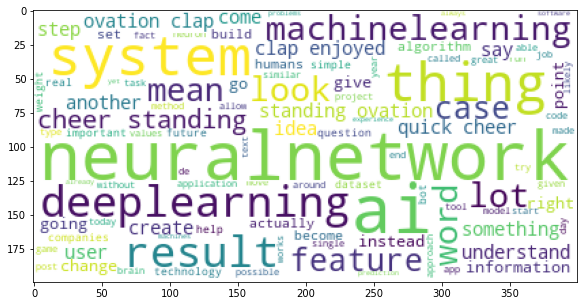

In [15]:
# Now let's detokenize the list to create a wordcloud later
clean_text = TreebankWordDetokenizer().detokenize(articles_tokens_clean)

# Now like before, we make a wordcloud
total_wordcloud = WordCloud(background_color = "white", max_words = 100).generate(clean_text)

plt.figure(figsize = (15, 5))
plt.imshow(total_wordcloud)

Much better than the old one, now I could see a lot of terms that refer to the skills I was looking for in this analysis.

#### *Time to run the queries!*

**5.1 - Top 10 most common skills:**<br>
<br>
For this one, changing the list into a dictionary was needed, where:

- key = Word
- value = How many times the word appeared in total

In [16]:
# Now lets use the tokenized list and make into a dictionary (clear of stopwords) to find the count of the 10 most used words
most_common_ten = dict(Counter(articles_tokens_clean).most_common(10))

I could now easily print the skills and their presence percentage using a for loop and the **"items()" function**:

In [17]:
# Now lets print the most common ten words first
print(f'The 10 most common words across all articles are:\n')

# Print frequencies and data from the dictionary
for item, count in most_common_ten.items(): 
    print(f'{item}: These skills appeared {count} times, or {((count*100)/len(articles_tokens_clean)):.4f}% of all the words')

The 10 most common words across all articles are:

ai: These skills appeared 1192 times, or 0.4103% of all the words
machinelearning: These skills appeared 1176 times, or 0.4048% of all the words
neuralnetwork: These skills appeared 734 times, or 0.2526% of all the words
deeplearning: These skills appeared 711 times, or 0.2447% of all the words
r: These skills appeared 474 times, or 0.1631% of all the words
code: These skills appeared 469 times, or 0.1614% of all the words
neuralnetworks: These skills appeared 458 times, or 0.1576% of all the words
go: These skills appeared 457 times, or 0.1573% of all the words
system: These skills appeared 455 times, or 0.1566% of all the words
algorithms: These skills appeared 451 times, or 0.1552% of all the words


This is the first one of the two answers I wanted to find and the most important one, if you remember what the two objectives I wanted to focus on were.

Surprisingly even though the test dataset was not the one with the job postings, the most common and relevant words in the articles were still skills that are very often required in today's IT jobs.

**5.2 - Top 10 most common pairings:**<br>
<br>
Now I wanted to try and associate the skills in pairs, to make **combinations of skills** that may be useful for people looking into IT jobs that could learn more than one skill at the time. Since those are combination of two, I will call them bi-skillsets for this report.

The query here may seem more complicated, but the code is pretty self-explanatory:

     - I made 2 new lists
     - Cycling the result gotten before 5 times, I filled the 2 lists with combinations and their corresponding frequencies


In [18]:
# We make 2 lists for the 10 most common items and key of the dictionary and populate them
ten_most_common_words = []
ten_most_common_freqs = []

for item, count in most_common_ten.items(): 
    ten_most_common_words.append(item) 
    ten_most_common_freqs.append(count)

# Make lists for items and frequencies combinations
skill_combinations = []
skill_combination_freqs = []

# Now we create the combinations and append them to the lists
for i in range(5):
    skill_comb_i1 = ten_most_common_words[i] + '/' + ten_most_common_words[i+1]
    skill_comb_i2 = ten_most_common_words[i] + '/' + ten_most_common_words[i+2]
    skill_comb_i3 = ten_most_common_words[i] + '/' + ten_most_common_words[i+3]
    
    skill_comb_freqs_i1 = ten_most_common_freqs[i] + ten_most_common_freqs[i+1]
    skill_comb_freqs_i2 = ten_most_common_freqs[i] + ten_most_common_freqs[i+2]
    skill_comb_freqs_i3 = ten_most_common_freqs[i] + ten_most_common_freqs[i+3]
    
    skill_combinations.extend((skill_comb_i1, skill_comb_i2, skill_comb_i3))
    skill_combination_freqs.extend((skill_comb_freqs_i1, skill_comb_freqs_i2, skill_comb_freqs_i3))
    
print(f'{skill_combinations}')
print(f'{skill_combination_freqs}')

['ai/machinelearning', 'ai/neuralnetwork', 'ai/deeplearning', 'machinelearning/neuralnetwork', 'machinelearning/deeplearning', 'machinelearning/r', 'neuralnetwork/deeplearning', 'neuralnetwork/r', 'neuralnetwork/code', 'deeplearning/r', 'deeplearning/code', 'deeplearning/neuralnetworks', 'r/code', 'r/neuralnetworks', 'r/go']
[2368, 1926, 1903, 1910, 1887, 1650, 1445, 1208, 1203, 1185, 1180, 1169, 943, 932, 931]


It worked! Now, to get the same output as the previous query, I also needed to transform the list back into a dictionary:

In [19]:
# Now we make them into a new dictionary and add items and frequencies as key and value
skills_freqs_combinations = {}

for i in range(10):
    skills_freqs_combinations.update({skill_combinations[i] : skill_combination_freqs[i]})

As the final step, the most common skills (as pairings) or **bi-skillsets** were printed for my second query:

In [20]:
# Now print frequencies and data from the dictionary like before
print(f'The 10 most common pairings of skills across all articles are:\n')

for combination, count in skills_freqs_combinations.items(): 
    print(f'{combination}: These skills appeared {count} times, or {((count*100)/len(articles_tokens_clean)):.4f}% of all the words')

The 10 most common pairings of skills across all articles are:

ai/machinelearning: These skills appeared 2368 times, or 0.8150% of all the words
ai/neuralnetwork: These skills appeared 1926 times, or 0.6629% of all the words
ai/deeplearning: These skills appeared 1903 times, or 0.6550% of all the words
machinelearning/neuralnetwork: These skills appeared 1910 times, or 0.6574% of all the words
machinelearning/deeplearning: These skills appeared 1887 times, or 0.6495% of all the words
machinelearning/r: These skills appeared 1650 times, or 0.5679% of all the words
neuralnetwork/deeplearning: These skills appeared 1445 times, or 0.4973% of all the words
neuralnetwork/r: These skills appeared 1208 times, or 0.4158% of all the words
neuralnetwork/code: These skills appeared 1203 times, or 0.4141% of all the words
deeplearning/r: These skills appeared 1185 times, or 0.4079% of all the words


***

## **6.**
## **Conclusions**<br><br><br>

**Conclusions:**<br>
<br>
To wrap it up, the two queries ran correctly and worked out pretty good at the end. 

Unexpectedly, the outputs showed how those skills are so important and frequent in today's world, that they can also make their appearance in common articles, not only job postings.

Thus, these results are very promising, already **giving insight on what could be very helpful to study and master for the purpose of being a more appealing candidate** and having an impact in a wide range of today's IT industry.<br>


***

## **Bibliography**<br><br><br>

- [Kaggle](https://www.kaggle.com/datasets): Kaggle provided the dataset used for this analysis.

<br>

- [Datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python): Datacamp offers a very detailed article on how to setup and display Wordclouds, between other things. 